In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import graphviz
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

from IPython.display import SVG, display
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 103783

In [2]:
def preprocesar_data_frame(df):
    y = df['G3']
    X = df.drop(columns=['G3'])
    return (X, y)

def metricas(y_test,y_pred):
    print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
    print("R2 Score:",r2_score(y_test,y_pred))
    
def plot_tree(arbol,data):
    dot_data = tree.export_graphviz(
        arbol,
        out_file=None,
        feature_names=data.columns,
        filled=True,
        rounded=True,

    )
    graph = graphviz.Source(dot_data)
    display(SVG(graph.pipe(format='svg')))

In [3]:
df = pd.read_csv("student-por.csv")
(X,y) = preprocesar_data_frame(df)
X_prepos = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

In [4]:
parametros = { "criterion":["mse","friedman_mse","mae"], "max_depth":[2,3,4,5,6,7],
               "max_features":["auto","sqrt","log2"],"splitter":["best","random"],
              "random_state":[RANDOM_STATE]}
arbol = DecisionTreeRegressor()
regresor = GridSearchCV(arbol,parametros,cv=10, verbose=0,scoring="neg_mean_squared_error")
regresor.fit(X_train,y_train)
regresor.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'random_state': 103783,
 'splitter': 'best'}

Mean Squared Error: 3.1434085182651055
Mean Absolute Error: 0.9578226552341877
R2 Score: 0.6854484131723403


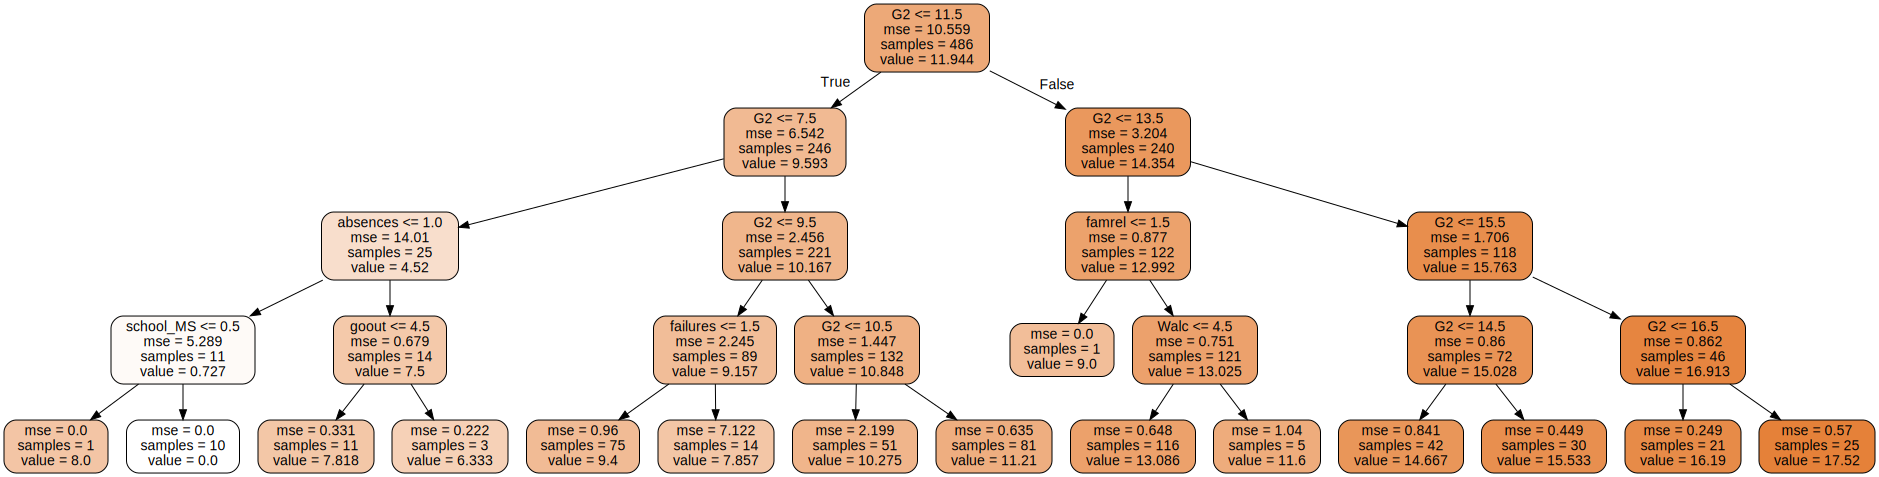

In [5]:
arbol = DecisionTreeRegressor(criterion= 'mse',max_depth=4,max_features='auto',splitter="best",random_state=RANDOM_STATE)
arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

metricas(y_test,y_pred)
plot_tree(arbol,X_train)